In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import csv

pd.read_csv('CO2_DATA2.csv', sep=' ')
co2_data = pd.read_csv('CO2_DATA2.csv', sep=' ')

# I) NIVEAU MONDIAL 

9.05008
21.28784000000001
{1959: 9.05008, 1960: 5.93568, 1961: 9.08672, 1962: 6.7783999999999995, 1963: 8.75696, 1964: 5.569280000000001, 1965: 10.369119999999999, 1966: 7.437920000000002, 1967: 6.668480000000001, 1968: 4.543359999999998, 1969: 12.2744, 1970: 13.30032, 1971: 6.265440000000002, 1972: 11.065279999999998, 1973: 9.01344, 1974: 0.10992000000000246, 1975: 6.228799999999996, 1976: 5.239519999999999, 1977: 10.662239999999999, 1978: 5.605920000000001, 1979: 12.860640000000004, 1980: 14.655999999999999, 1981: 6.924959999999999, 1982: 10.58896, 1983: 14.802560000000001, 1984: 6.521919999999998, 1985: 7.8409599999999955, 1986: 10.112640000000003, 1987: 17.36736, 1988: 12.054560000000002, 1989: 7.1448, 1990: 11.724799999999998, 1991: 12.640799999999997, 1992: 11.1752, 1993: 8.317279999999997, 1994: 14.69264, 1995: 14.17968, 1996: 9.08672, 1997: 12.4576, 1998: 14.839200000000002, 1999: 7.98752, 2000: 7.840959999999999, 2001: 14.509439999999998, 2002: 19.71232, 2003: 15.0956800000000

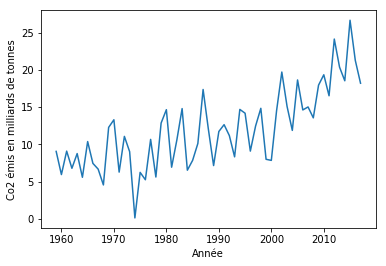

In [2]:
emissions = [float(j.replace(",", "."))*3.664 for j in [i for i in co2_data['Em']]]
land_use = [float(j.replace(",", "."))*3.664 for j in [i for i in co2_data['land-use']]]
Année = [int(i) for i in co2_data['Year']]
ocean_sink = [float(j.replace(",", "."))*3.664 for j in [i for i in co2_data['oc']]]
land_sink = [float(j.replace(",", "."))*3.664 for j in [i for i in co2_data['land']]]

print(emissions[0] + land_use[0] - (ocean_sink[0] + land_sink[0]))
print(emissions[57] + land_use[57] - (ocean_sink[57] + land_sink[57]))

def calcul_co2_y(Le,Lu,L_oc,L_land,list_y):
    
    D = {}
    
    for i in range(0,len(Le)):
        Co2 = (Le[i] + Lu[i] - (L_oc[i] + L_land[i]))
        D[list_y[i]] = Co2
       
    list_Co2 = [i for i in D.values()]
    
    plt.plot(list_y , list_Co2)
    plt.xlabel('Année')
    plt.ylabel('Co2 émis en milliards de tonnes')
    
    return D

print(calcul_co2_y(emissions,land_use,ocean_sink,land_sink,Année))

In [3]:
def predict_em(slope, intercept, x):
    
    return slope*np.asarray(x) + intercept

def graph_em():
    
    X = Année
    Y = emissions
    
    axes = plt.axes()
    axes.grid()
    plt.title('Approximation du parametre Emissions')
    plt.xlabel('Année')
    plt.ylabel('Emissions de Co2 en Mt')
    plt.scatter(X,Y)
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
    plt.plot(X, predict_em(slope, intercept, X), c='r')
    plt.show()   

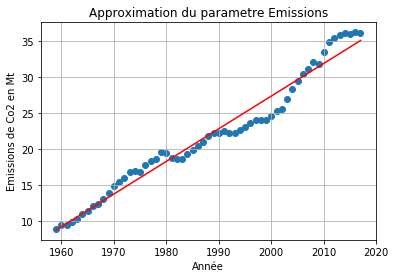

In [4]:
graph_em()

In [5]:
def predict_land_u(slope, intercept, x):
    
    return slope*np.asarray(x) + intercept

def graph_land_u():
    
    X = Année
    Y = land_use
    
    axes = plt.axes()
    axes.grid()
    plt.title('Approximation du parametre land-use')
    plt.xlabel('Année')
    plt.ylabel('Utilisations Terres en Mt de CO2')
    plt.scatter(X,Y)
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
    plt.plot(X, predict_land_u(slope, intercept, X), c='r')
    plt.show()

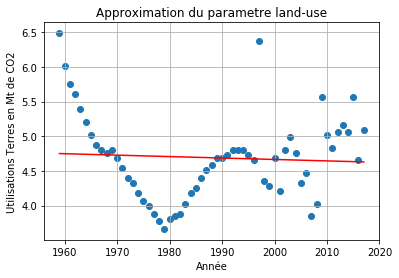

In [6]:
graph_land_u()

In [7]:
def predict_oc(slope, intercept, x):
    
    return slope*np.asarray(x) + intercept

def graph_oc():
    
    X = Année
    Y = ocean_sink
    
    axes = plt.axes()
    axes.grid()
    plt.title('Approximation du parametre ocean_sink')
    plt.xlabel('Année')
    plt.ylabel('Absoption en Mt de CO2')
    plt.scatter(X,Y)
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
    plt.plot(X, predict_oc(slope, intercept, X), c='r')
    plt.show()

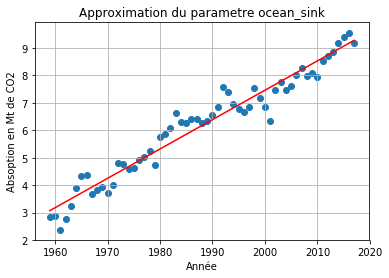

In [8]:
graph_oc()

In [9]:
def predict(slope, intercept, x):
    
    return slope*np.asarray(x) + intercept

def graph_land_s():
    
    X = Année
    Y = land_sink 
    
    axes = plt.axes()
    axes.grid()
    plt.title('Approximation du parametre land_sink ')
    plt.xlabel('Année')
    plt.ylabel('Absoption en Mt de CO2')
    plt.scatter(X,Y)
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
    plt.plot(X, predict(slope, intercept, X), c='r')
    plt.show()

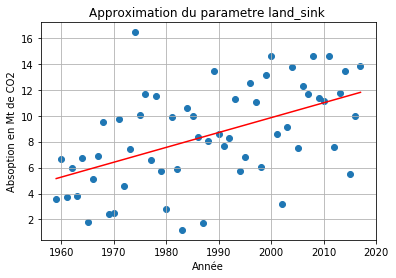

In [10]:
graph_land_s()

In [11]:
def predict_em(year):
    
    X = Année 
    Y = emissions    
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
    
    return slope*year + intercept

def predict_land_u(year):
    
    X = Année 
    Y = land_use    
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
    
    return slope*year + intercept

def predict_oc(year):
    
    X = Année 
    Y = ocean_sink  
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
    
    return slope*year + intercept

def predict_land_s(year):
    
    X = Année
    Y = land_sink     
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
    
    return slope*year + intercept



def list_final(annee_final):
    
    X_Annee = [i for i in range(1959,annee_final)]
    Y_final = []
    
    for i in X_Annee:
        Y_final.append(predict_em(i) + predict_land_u(i) - predict_oc(i) - predict_land_s(i))
        
    return Y_final

def graph_final(annee_final):
    
    D = {}
    
    for i in range(0,len(emissions)):
        C = emissions[i] + land_use[i] - (ocean_sink[i] + land_sink[i])
        D[Année[i]] = C
       
    list_C = [i for i in D.values()]
    
    X_Annee = [i for i in range(1959,annee_final)]
    
    axes = plt.axes()
    axes.grid()
    plt.plot(Année , list_C)
    plt.xlabel('Année')
    plt.ylabel('Co2 émis en milliards de tonnes')
    
    plt.plot(X_Annee , list_final(annee_final), c='r')
    plt.show()
    
def valeur(annee_final):
    
    X_Annee = [i for i in range(1959,annee_final)]
    D = dict()
    
    for i in range(0, len(X_Annee)):
        
        D[X_Annee[i]] = list_final(annee_final)[i]
                   
    return D

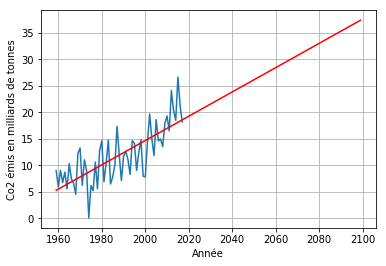

In [12]:
graph_final(2100)

In [13]:
valeur(2018)

{1959: 5.3184512542372975,
 1960: 5.547604367036872,
 1961: 5.776757479836359,
 1962: 6.0059105926359315,
 1963: 6.2350637054354205,
 1964: 6.464216818234995,
 1965: 6.693369931034482,
 1966: 6.922523043834055,
 1967: 7.151676156633513,
 1968: 7.3808292694330895,
 1969: 7.609982382232605,
 1970: 7.839135495032178,
 1971: 8.06828860783164,
 1972: 8.297441720631213,
 1973: 8.5265948334307,
 1974: 8.7557479462303,
 1975: 8.984901059029873,
 1976: 9.214054171829364,
 1977: 9.443207284628937,
 1978: 9.672360397428395,
 1979: 9.901513510228,
 1980: 10.130666623027487,
 1981: 10.35981973582706,
 1982: 10.588972848626518,
 1983: 10.818125961426091,
 1984: 11.04727907422561,
 1985: 11.276432187025183,
 1986: 11.505585299824642,
 1987: 11.734738412624218,
 1988: 11.963891525423705,
 1989: 12.193044638223306,
 1990: 12.422197751022765,
 1991: 12.651350863822337,
 1992: 12.880503976621828,
 1993: 13.1096570894214,
 1994: 13.338810202221001,
 1995: 13.567963315020464,
 1996: 13.797116427820065,
 19

In [38]:
predict_em(2017) + predict_land_u(2017)

39.689317423728895

# II ) NIVEAU CONTINENTALE : 

In [54]:
pd.read_csv('terri.csv', sep=' ')
terri = pd.read_csv('terri.csv', sep=' ')
pd.read_csv('land.csv', sep=' ')
land = pd.read_csv('land.csv', sep=' ')

NA_l = [ float(j) for j in [i.replace(",", ".") for i in land['N/A']]]
NA_t = [ float(j) for j in [i.replace(",", ".") for i in terri['N/A']]]
SA_l = [ float(j) for j in [i.replace(",", ".") for i in land['Unnamed: 1']]]
SA_t = [ float(j) for j in [i.replace(",", ".") for i in terri['Unnamed: 1']]]
Asie_l = [ float(j) for j in [i.replace(",", ".") for i in land['Unnamed: 2']]]
Asie_t = [ float(j) for j in [i.replace(",", ".") for i in terri['Unnamed: 2']]]
EU_l = [ float(j) for j in [i.replace(",", ".") for i in land['Unnamed: 3']]]
EU_t = [ float(j) for j in [i.replace(",", ".") for i in terri['Unnamed: 3']]]
Oce_l = [ float(j) for j in [i.replace(",", ".") for i in land['Unnamed: 4']]]
Oce_t = [ float(j) for j in [i.replace(",", ".") for i in terri['Unnamed: 4']]]
Afri_l = [ float(j) for j in [i.replace(",", ".") for i in land['Unnamed: 5']]]
Afri_t = [ float(j) for j in [i.replace(",", ".") for i in terri['Unnamed: 5']]]
Année_l = [ j for j in range(1960,2011)]
Année_t = [ j for j in range(1960,2018)]

1. AMERIQUE DU NORD 

In [55]:
def predict(slope, intercept, x):
    
    return slope*np.asarray(x) + intercept

def graph_NA_l():
    
    X = Année_l
    Y = NA_l
    
    axes = plt.axes()
    axes.grid()
    plt.title('Approximation du parametre NA_l')
    plt.xlabel('Année')
    plt.ylabel('Emission land NA en Millions de tonne de CO2')
    plt.scatter(X,Y)
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
    plt.plot(X, predict(slope, intercept, X), c='r')
    plt.show()
    
def graph_NA_t():
    
    X = Année_t
    Y = NA_t
    
    axes = plt.axes()
    axes.grid()
    plt.title('Approximation du parametre NA_t')
    plt.xlabel('Année')
    plt.ylabel('Emission terri NA en Millions de tonne de CO2')
    plt.scatter(X,Y)
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
    plt.plot(X, predict(slope, intercept, X), c='r')
    plt.show()

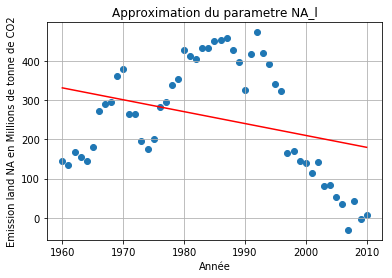

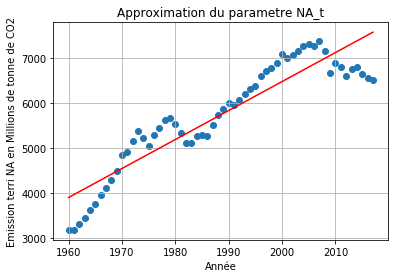

In [56]:
graph_NA_l()
graph_NA_t()

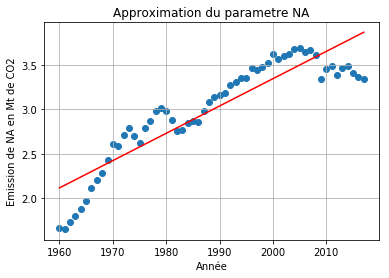

In [57]:
def x(an):
    
    X = Année_l
    Y = NA_l
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
    
    return slope*an + intercept

NA_l_bis = [x(i) for i in range(2011,2018)]
NA_l_bis2 = NA_l + NA_l_bis

NA_Em = [NA_l_bis2[i]+NA_t[i] for i in range(0,len(NA_t))]

NA = [(NA_Em[i]-NA_Em[i]*0.5)/1000 for i in range(0,len(Année_t))]

def graph_NA():
    
    X = Année_t
    Y = NA
    
    axes = plt.axes()
    axes.grid()
    plt.title('Approximation du parametre NA')
    plt.xlabel('Année')
    plt.ylabel('Emission de NA en Mt de CO2')
    plt.scatter(X,Y)
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
    plt.plot(X, predict(slope, intercept, X), c='r')
    plt.show()
    
graph_NA()

2. AMERIQUE DU SUD

In [58]:
def predict(slope, intercept, x):
    
    return slope*np.asarray(x) + intercept

def graph_SA_l():
    
    X = Année_l
    Y = SA_l
    
    axes = plt.axes()
    axes.grid()
    plt.title('Approximation du parametre SA_l')
    plt.xlabel('Année')
    plt.ylabel('Emission land SA en Millions de tonne de CO2')
    plt.scatter(X,Y)
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
    plt.plot(X, predict(slope, intercept, X), c='r')
    plt.show()
    
def graph_SA_t():
    
    X = Année_t
    Y = SA_t
    
    axes = plt.axes()
    axes.grid()
    plt.title('Approximation du parametre SA_t')
    plt.xlabel('Année')
    plt.ylabel('Emission terri SA en Millions de tonne de CO2')
    plt.scatter(X,Y)
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
    plt.plot(X, predict(slope, intercept, X), c='r')
    plt.show()

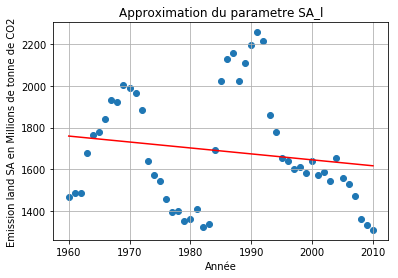

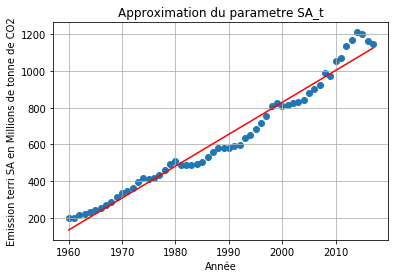

In [59]:
graph_SA_l()
graph_SA_t()

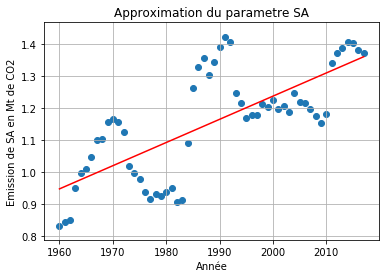

In [60]:
def x(an):
    
    X = Année_l
    Y = SA_l
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
    
    return slope*an + intercept

SA_l_bis = [x(i) for i in range(2011,2018)]
SA_l_bis2 = SA_l + SA_l_bis

SA_Em = [SA_l_bis2[i]+SA_t[i] for i in range(0,len(NA_t))]

SA = [(SA_Em[i]-SA_Em[i]*0.5)/1000 for i in range(0,len(Année_t))]

def graph_SA():
    
    X = Année_t
    Y = SA
    
    axes = plt.axes()
    axes.grid()
    plt.title('Approximation du parametre SA')
    plt.xlabel('Année')
    plt.ylabel('Emission de SA en Mt de CO2')
    plt.scatter(X,Y)
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
    plt.plot(X, predict(slope, intercept, X), c='r')
    plt.show()
    
graph_SA()

3. ASIE

In [61]:
def predict(slope, intercept, x):
    
    return slope*np.asarray(x) + intercept

def graph_Asie_l():
    
    X = Année_l
    Y = Asie_l
    
    axes = plt.axes()
    axes.grid()
    plt.title('Approximation du parametre Asie_l')
    plt.xlabel('Année')
    plt.ylabel('Emission land Asie en Millions de tonne de CO2')
    plt.scatter(X,Y)
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
    plt.plot(X, predict(slope, intercept, X), c='r')
    plt.show()
    
def graph_Asie_t():
    
    X = Année_t
    Y = Asie_t
    
    axes = plt.axes()
    axes.grid()
    plt.title('Approximation du parametre Asie_t')
    plt.xlabel('Année')
    plt.ylabel('Emission terri Asie en Millions de tonne de CO2')
    plt.scatter(X,Y)
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
    plt.plot(X, predict(slope, intercept, X), c='r')
    plt.show()

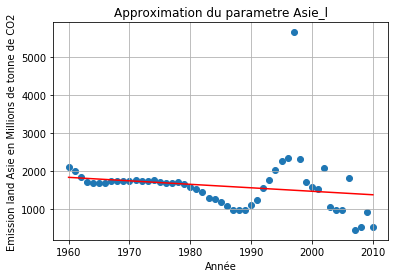

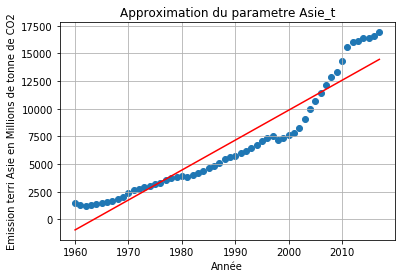

In [62]:
graph_Asie_l()
graph_Asie_t()

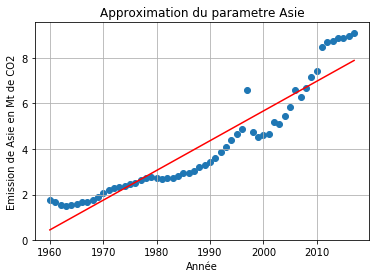

In [63]:
def x(an):
    
    X = Année_l
    Y = Asie_l
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
    
    return slope*an + intercept

Asie_l_bis = [x(i) for i in range(2011,2018)]
Asie_l_bis2 = Asie_l + Asie_l_bis

Asie_Em = [Asie_l_bis2[i]+Asie_t[i] for i in range(0,len(NA_t))]

Asie = [(Asie_Em[i]-Asie_Em[i]*0.5)/1000 for i in range(0,len(Année_t))]

def graph_Asie():
    
    X = Année_t
    Y = Asie
    
    axes = plt.axes()
    axes.grid()
    plt.title('Approximation du parametre Asie')
    plt.xlabel('Année')
    plt.ylabel('Emission de Asie en Mt de CO2')
    plt.scatter(X,Y)
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
    plt.plot(X, predict(slope, intercept, X), c='r')
    plt.show()
    
graph_Asie()

4. EUROPE

In [64]:
def predict(slope, intercept, x):
    
    return slope*np.asarray(x) + intercept

def graph_EU_l():
    
    X = Année_l
    Y = EU_l
    
    axes = plt.axes()
    axes.grid()
    plt.title('Approximation du parametre EU_l')
    plt.xlabel('Année')
    plt.ylabel('Emission land EU en Millions de tonne de CO2')
    plt.scatter(X,Y)
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
    plt.plot(X, predict(slope, intercept, X), c='r')
    plt.show()
    
def graph_EU_t():
    
    X = Année_t
    Y = EU_t
    
    axes = plt.axes()
    axes.grid()
    plt.title('Approximation du parametre EU_t')
    plt.xlabel('Année')
    plt.ylabel('Emission terri EU en Millions de tonne de CO2')
    plt.scatter(X,Y)
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
    plt.plot(X, predict(slope, intercept, X), c='r')
    plt.show()

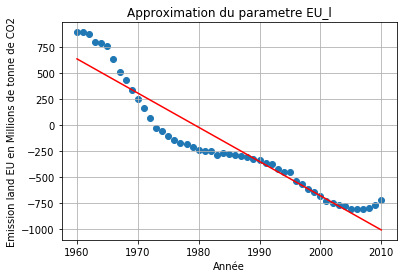

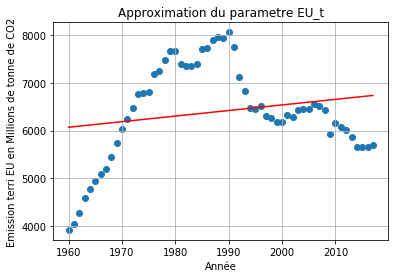

In [65]:
graph_EU_l()
graph_EU_t()

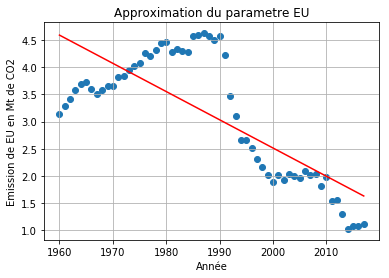

In [66]:
def x(an):
    
    X = Année_l
    Y = EU_l
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
    
    return slope*an + intercept

EU_l_bis = [x(i) for i in range(2011,2018)]
EU_l_bis2 = EU_l + EU_l_bis

EU_Em = [EU_l_bis2[i]+EU_t[i] for i in range(0,len(NA_t))]

EU = [(EU_Em[i]-NA_Em[i]*0.5)/1000 for i in range(0,len(Année_t))]

def graph_EU():
    
    X = Année_t
    Y = EU
    
    axes = plt.axes()
    axes.grid()
    plt.title('Approximation du parametre EU')
    plt.xlabel('Année')
    plt.ylabel('Emission de EU en Mt de CO2')
    plt.scatter(X,Y)
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
    plt.plot(X, predict(slope, intercept, X), c='r')
    plt.show()
    
graph_EU()

5. OCEANIE

In [67]:
def predict(slope, intercept, x):
    
    return slope*np.asarray(x) + intercept

def graph_Oce_l():
    
    X = Année_l
    Y = Oce_l
    
    axes = plt.axes()
    axes.grid()
    plt.title('Approximation du parametre Oce_l')
    plt.xlabel('Année')
    plt.ylabel('Emission land Oce en Millions de tonne de CO2')
    plt.scatter(X,Y)
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
    plt.plot(X, predict(slope, intercept, X), c='r')
    plt.show()
    
def graph_Oce_t():
    
    X = Année_t
    Y = Oce_t
    
    axes = plt.axes()
    axes.grid()
    plt.title('Approximation du parametre Oce_t')
    plt.xlabel('Année')
    plt.ylabel('Emission terri Oce en Millions de tonne de CO2')
    plt.scatter(X,Y)
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
    plt.plot(X, predict(slope, intercept, X), c='r')
    plt.show()

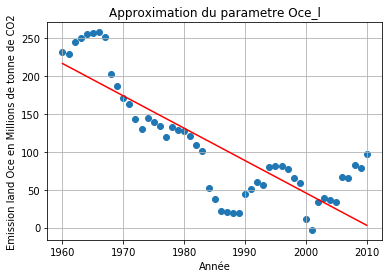

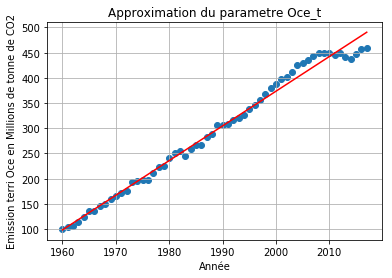

In [68]:
graph_Oce_l()
graph_Oce_t()

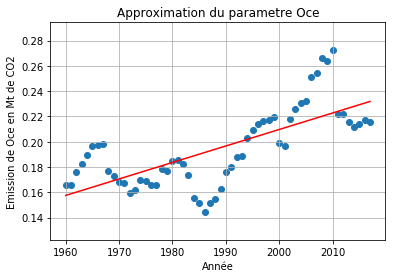

In [69]:
def x(an):
    
    X = Année_l
    Y = Oce_l
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
    
    return slope*an + intercept

Oce_l_bis = [x(i) for i in range(2011,2018)]
Oce_l_bis2 = Oce_l + Oce_l_bis

Oce_Em = [Oce_l_bis2[i]+Oce_t[i] for i in range(0,len(NA_t))]

Oce = [(Oce_Em[i]-Oce_Em[i]*0.5)/1000 for i in range(0,len(Année_t))]

def graph_Oce():
    
    X = Année_t
    Y = Oce
    
    axes = plt.axes()
    axes.grid()
    plt.title('Approximation du parametre Oce')
    plt.xlabel('Année')
    plt.ylabel('Emission de Oce en Mt de CO2')
    plt.scatter(X,Y)
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
    plt.plot(X, predict(slope, intercept, X), c='r')
    plt.show()
    
graph_Oce()

6. AFRIQUE

In [70]:
def predict(slope, intercept, x):
    
    return slope*np.asarray(x) + intercept

def graph_Afri_l():
    
    X = Année_l
    Y = Afri_l
    
    axes = plt.axes()
    axes.grid()
    plt.title('Approximation du parametre Afri_l')
    plt.xlabel('Année')
    plt.ylabel('Emission land Afri en Millions de tonne de CO2')
    plt.scatter(X,Y)
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
    plt.plot(X, predict(slope, intercept, X), c='r')
    plt.show()
    
def graph_Afri_t():
    
    X = Année_t
    Y = Afri_t
    
    axes = plt.axes()
    axes.grid()
    plt.title('Approximation du parametre Afri_t')
    plt.xlabel('Année')
    plt.ylabel('Emission terri Afri en Millions de tonne de CO2')
    plt.scatter(X,Y)
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
    plt.plot(X, predict(slope, intercept, X), c='r')
    plt.show()

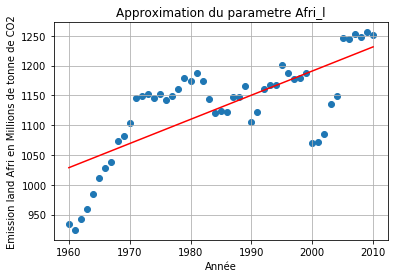

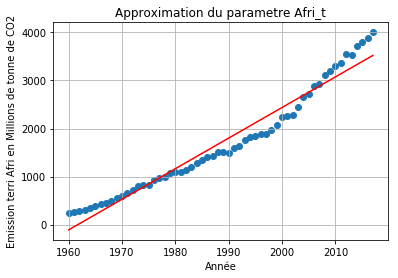

In [71]:
graph_Afri_l()
graph_Afri_t()

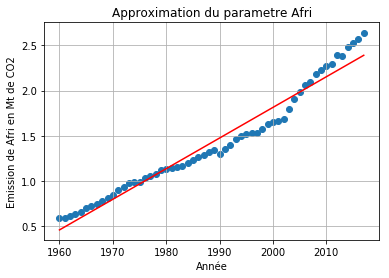

In [72]:
def x(an):
    
    X = Année_l
    Y = Afri_l
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
    
    return slope*an + intercept

Afri_l_bis = [x(i) for i in range(2011,2018)]
Afri_l_bis2 = Afri_l + Afri_l_bis

Afri_Em = [Afri_l_bis2[i]+Afri_t[i] for i in range(0,len(NA_t))]

Afri = [(Afri_Em[i]-Afri_Em[i]*0.5)/1000 for i in range(0,len(Année_t))]

def graph_Afri():
    
    X = Année_t
    Y = Afri
    
    axes = plt.axes()
    axes.grid()
    plt.title('Approximation du parametre Afri')
    plt.xlabel('Année')
    plt.ylabel('Emission de Afri en Mt de CO2')
    plt.scatter(X,Y)
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
    plt.plot(X, predict(slope, intercept, X), c='r')
    plt.show()
    
graph_Afri()

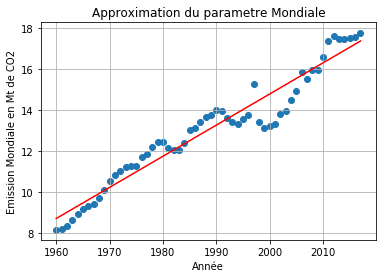

In [73]:
def graph_Mondiale():
    
    X = Année_t
    Y = [NA[i]+SA[i]+EU[i]+Afri[i]+Oce[i]+Asie[i] for i in range(0,len(NA))]
    
    axes = plt.axes()
    axes.grid()
    plt.title('Approximation du parametre Mondiale')
    plt.xlabel('Année')
    plt.ylabel('Emission Mondiale en Mt de CO2')
    plt.scatter(X,Y)
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
    plt.plot(X, predict(slope, intercept, X), c='r')
    plt.show()
    
graph_Mondiale()